In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
train = pd.read_csv("C://Users//ACER//Downloads/playground-series-s4e6/train.csv")

In [5]:
train

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [7]:
train.shape


(76518, 38)

In [9]:
train.Target.value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [11]:
train.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [13]:
train.drop('id', axis=1, inplace=True)

In [19]:
train.duplicated().sum()

0

In [21]:
train.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                 

In [33]:
train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [37]:
num_ds = train.select_dtypes(include=["int64","float64"])
cat_ds = train.select_dtypes(include=[object])

In [43]:
cat_cols

Index(['Target'], dtype='object')

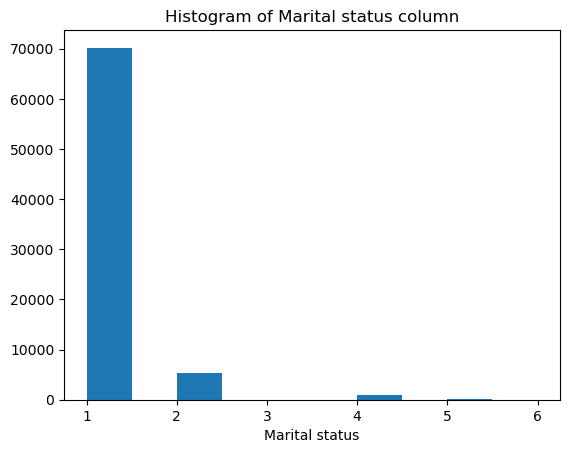

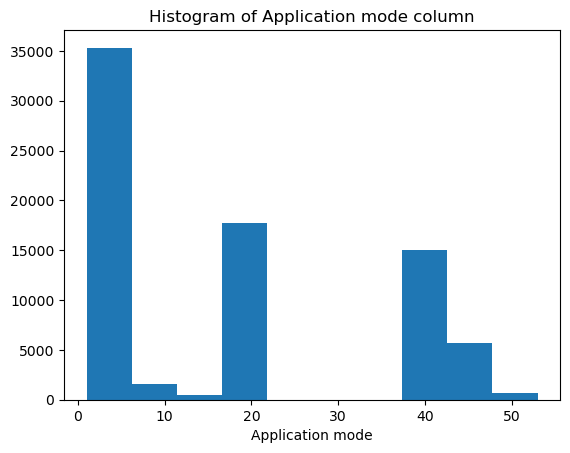

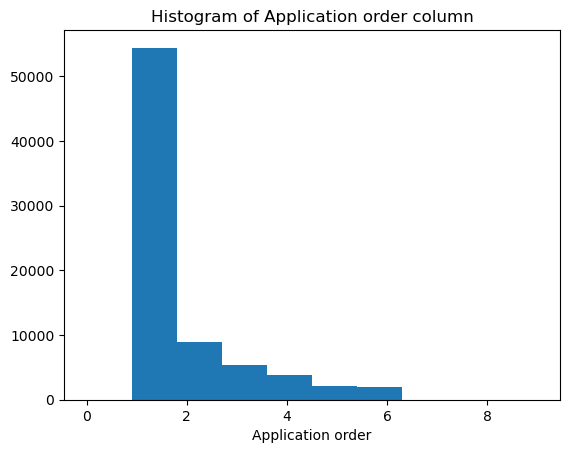

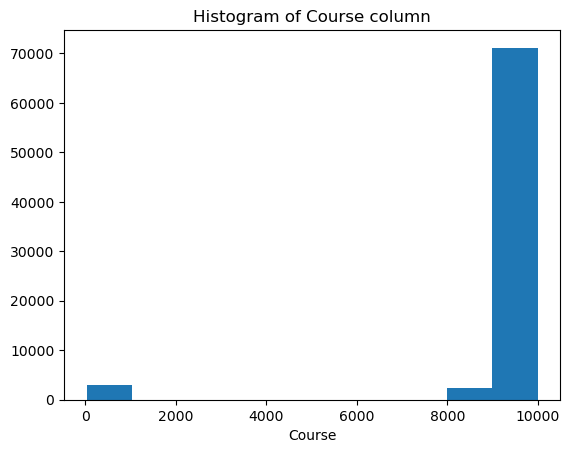

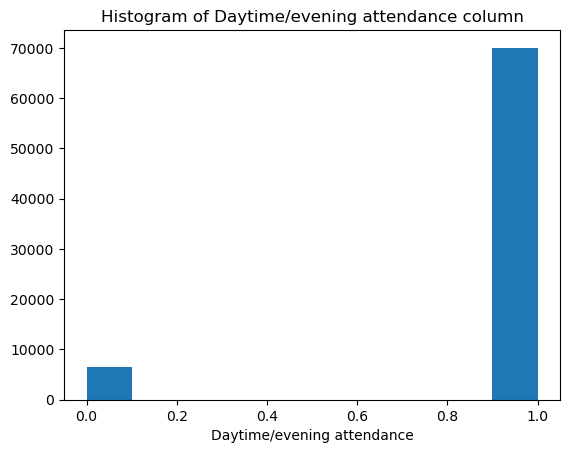

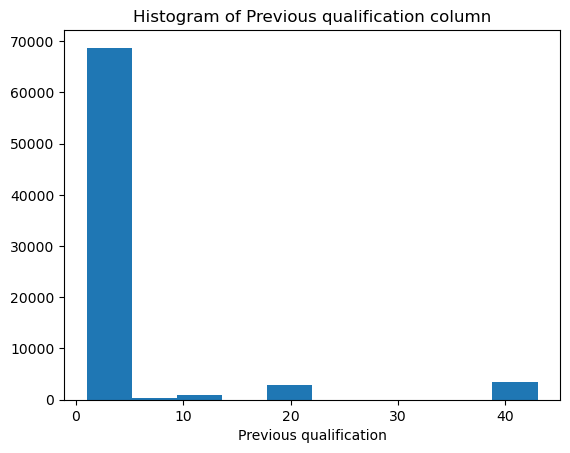

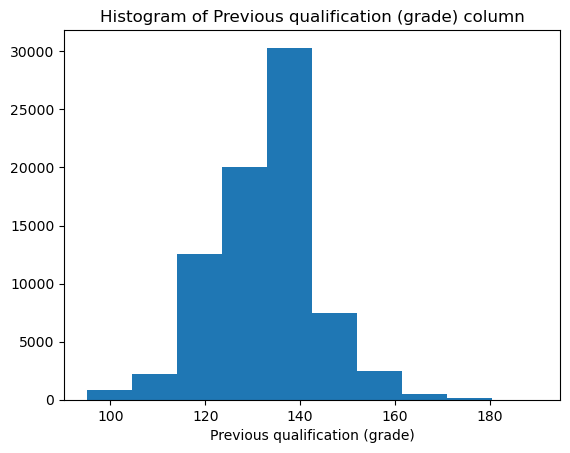

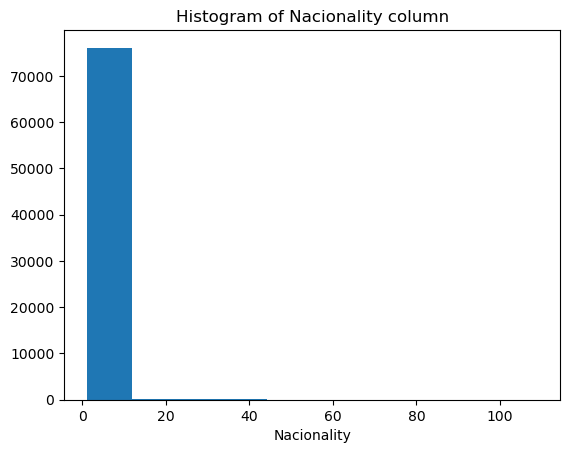

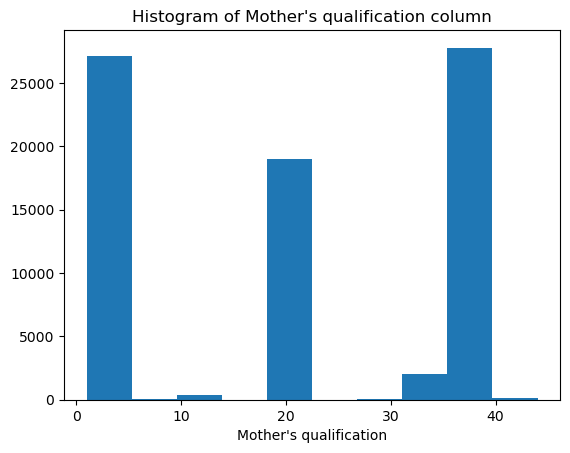

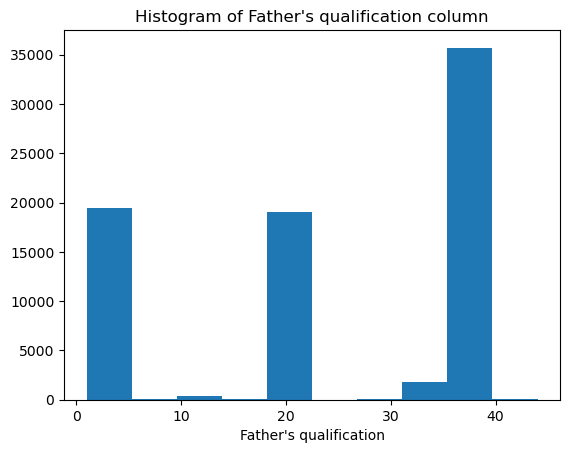

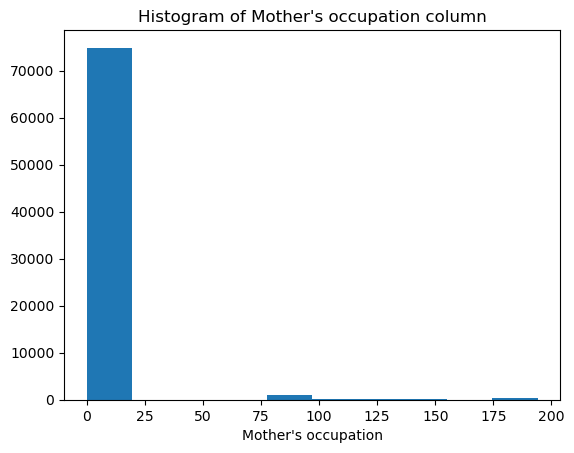

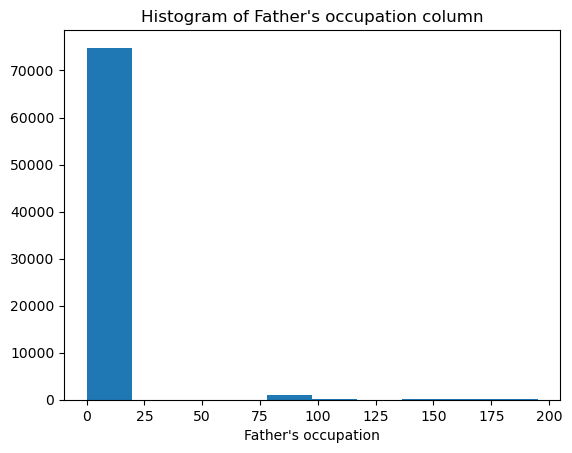

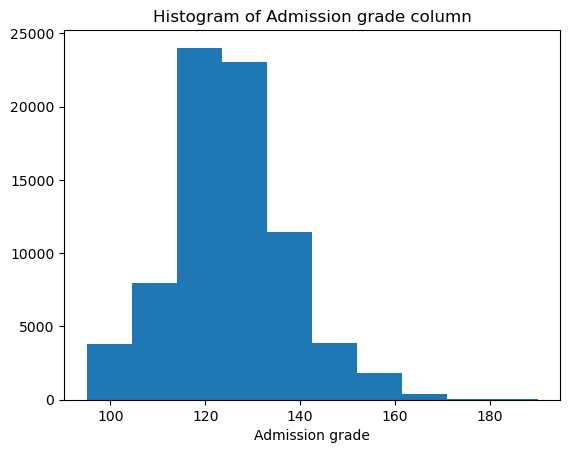

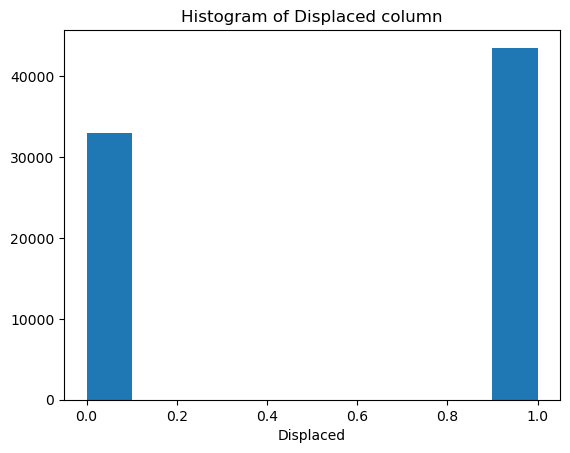

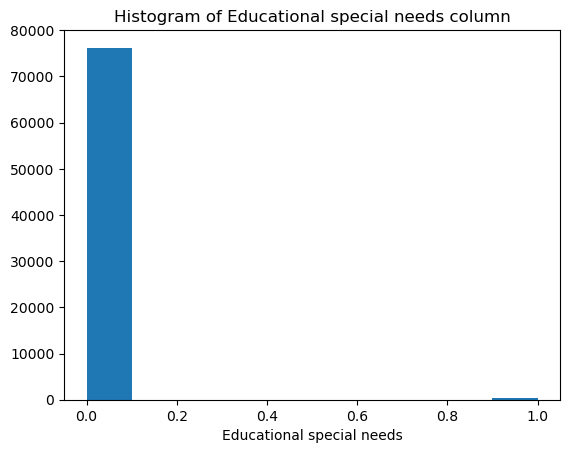

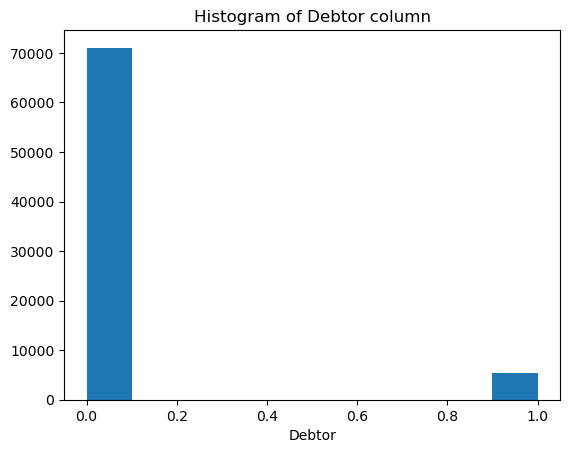

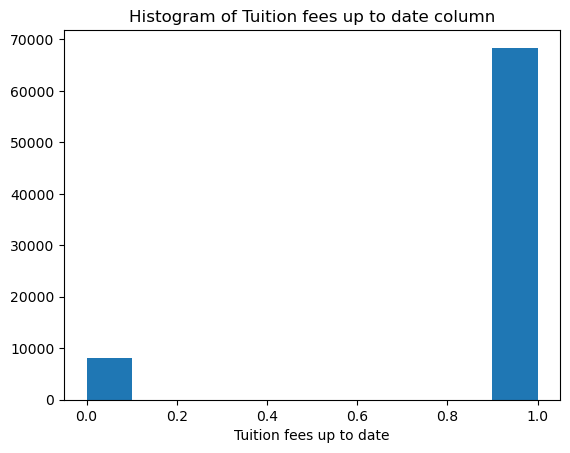

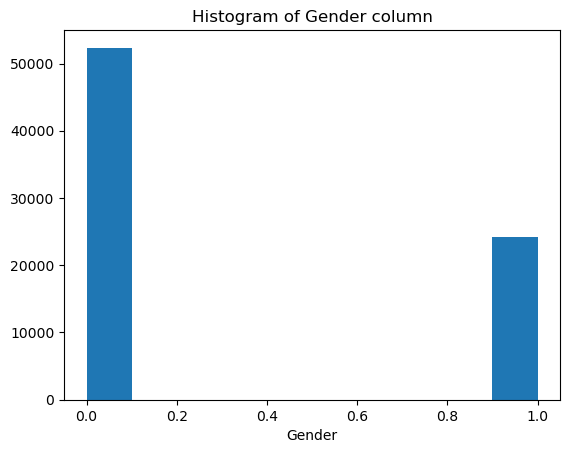

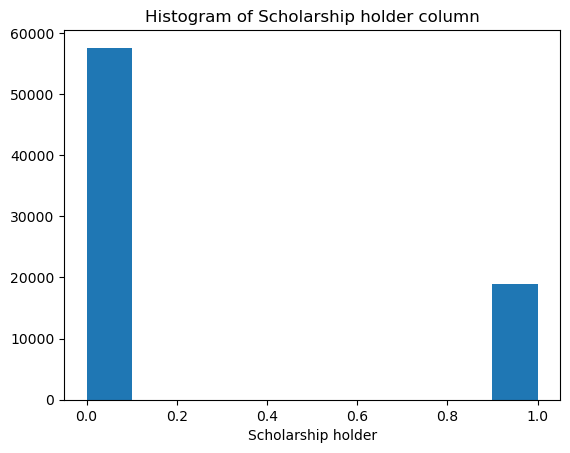

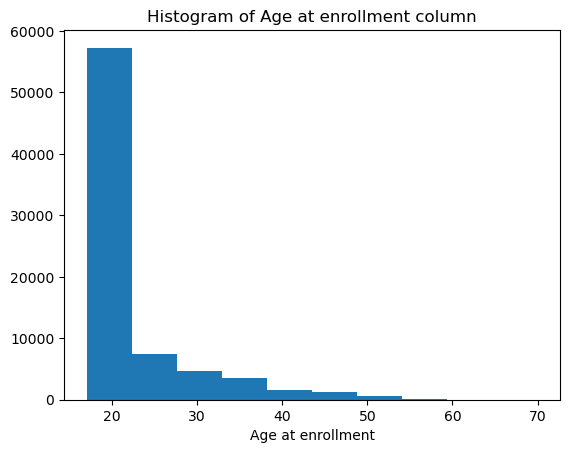

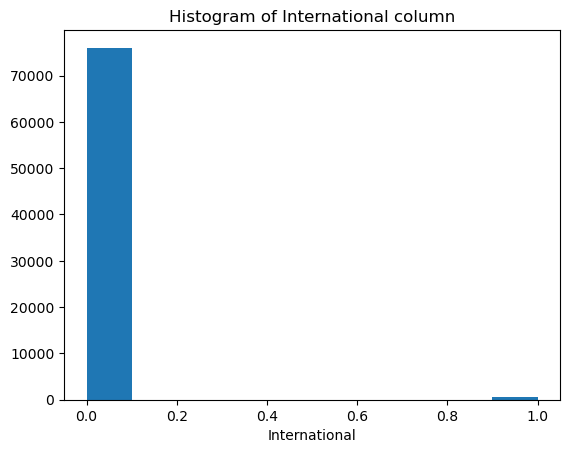

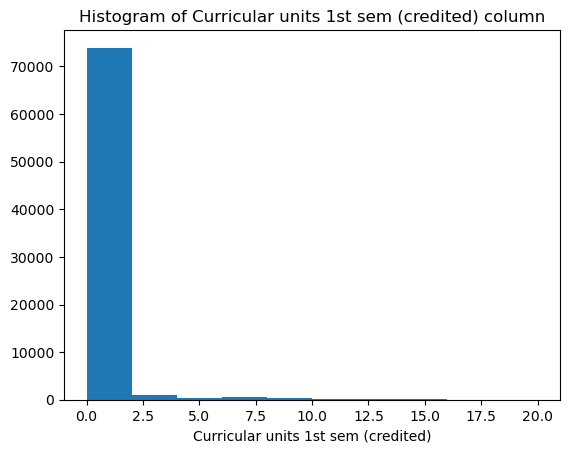

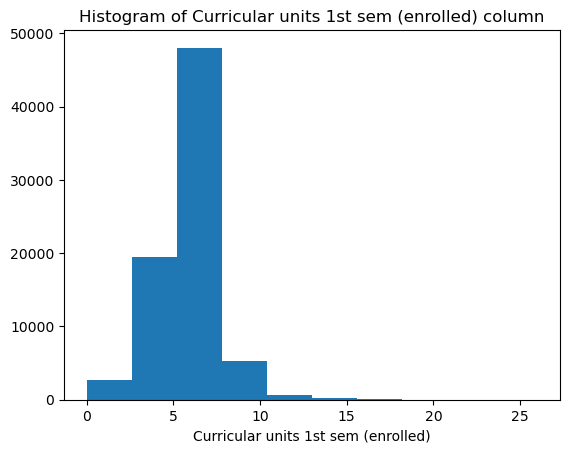

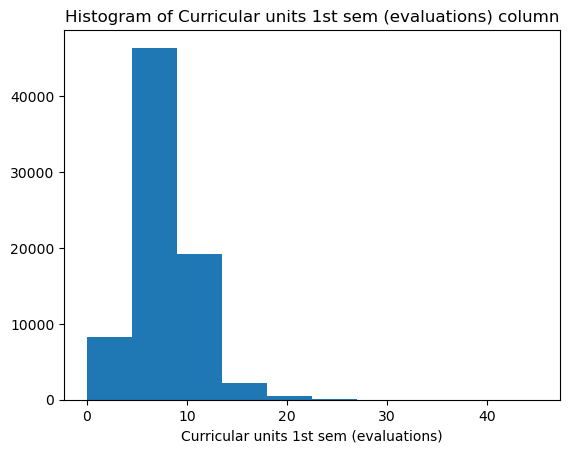

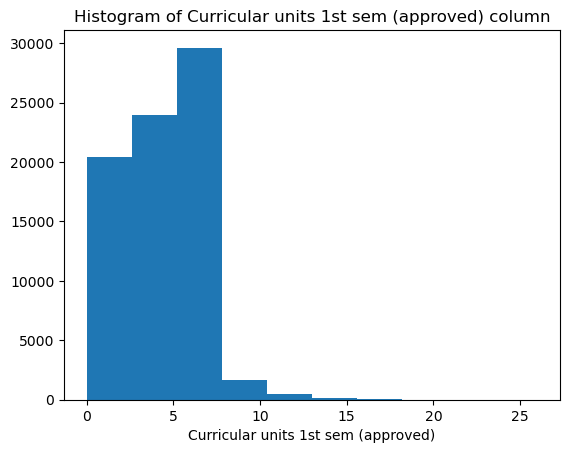

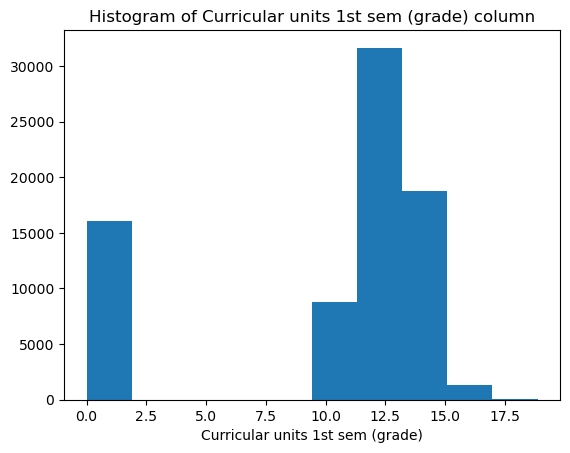

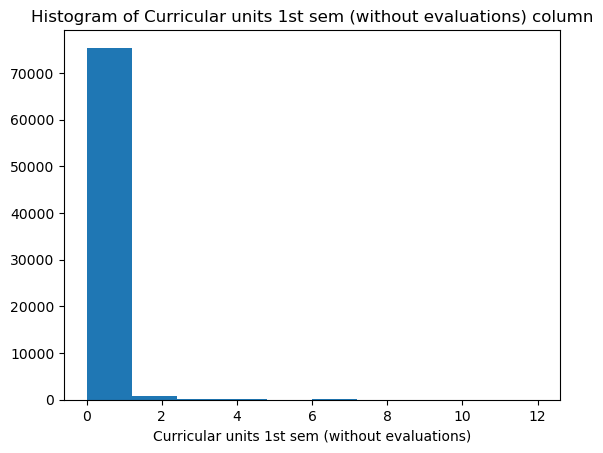

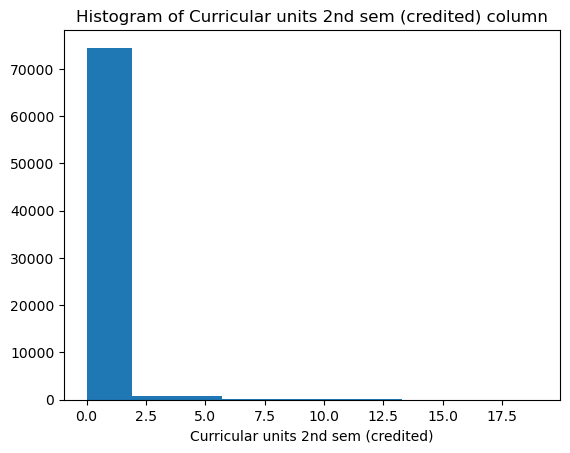

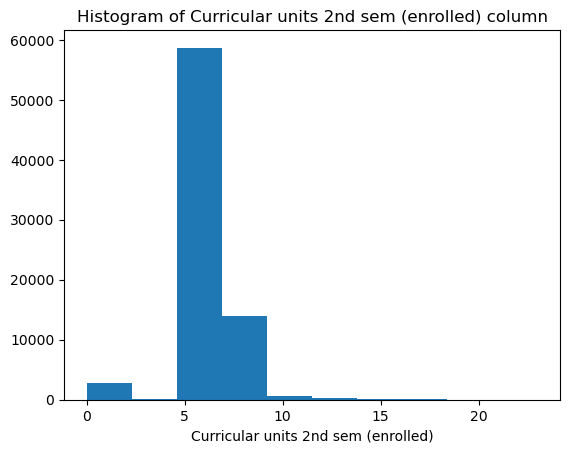

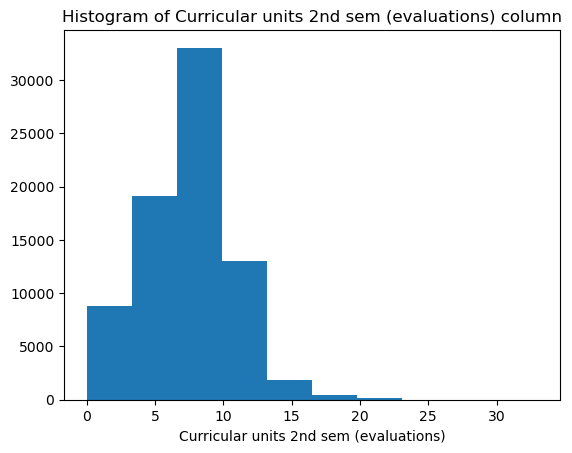

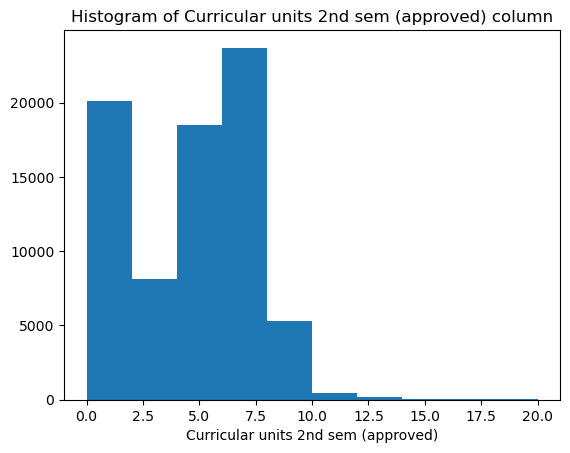

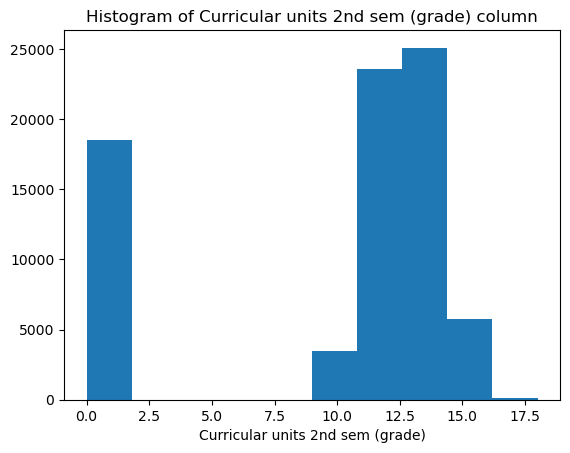

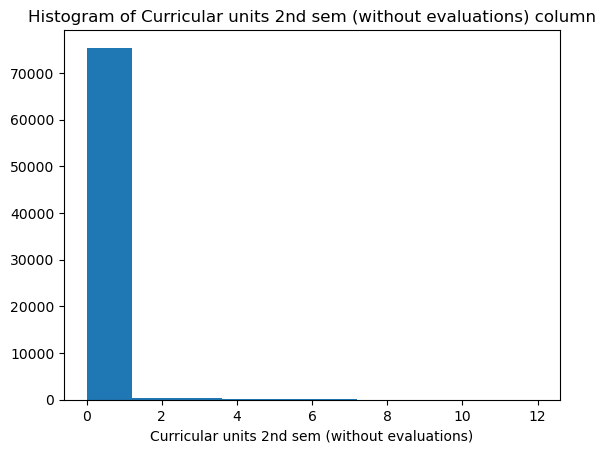

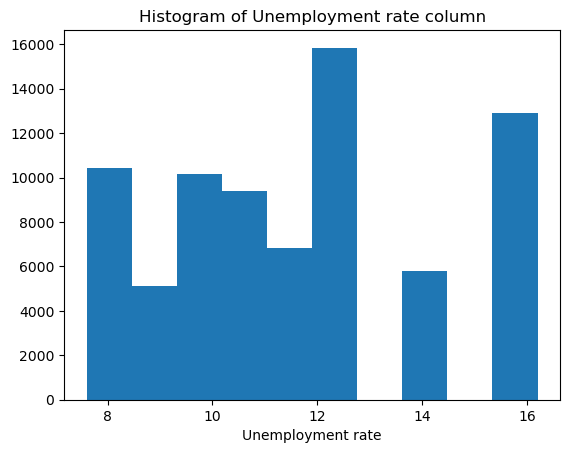

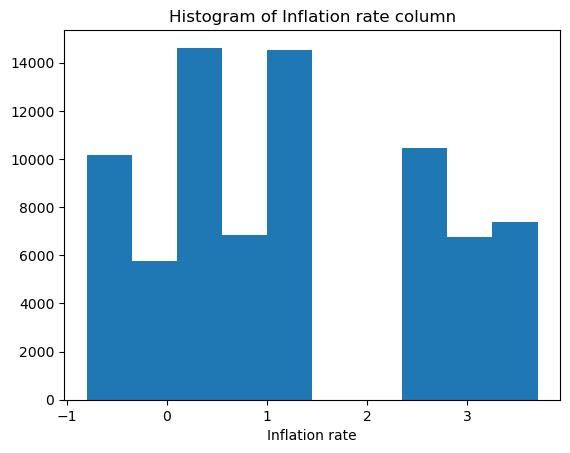

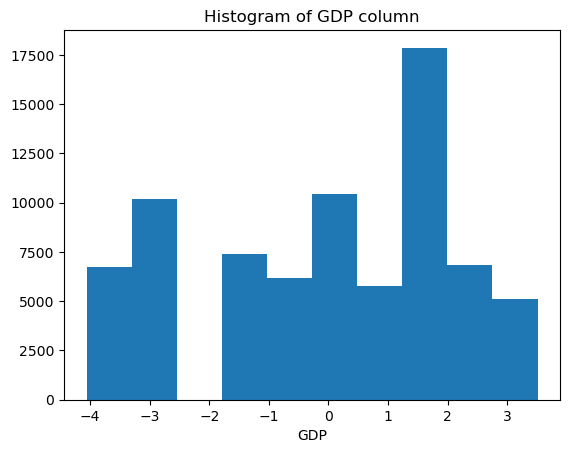

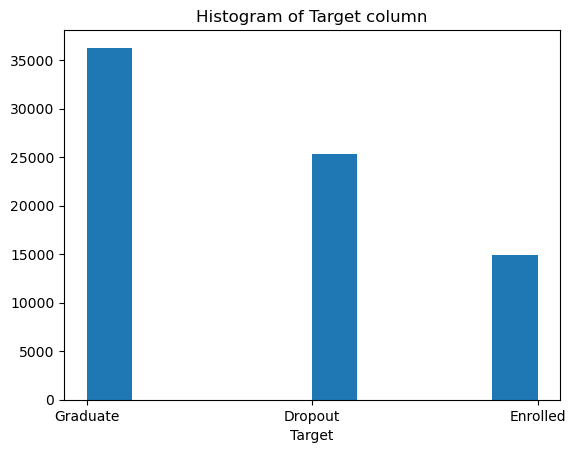

In [45]:
for col in train: 
    plt.hist(train[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.show()

In [51]:
train.nunique()

Marital status                                       6
Application mode                                    22
Application order                                    8
Course                                              19
Daytime/evening attendance                           2
Previous qualification                              21
Previous qualification (grade)                     110
Nacionality                                         18
Mother's qualification                              35
Father's qualification                              39
Mother's occupation                                 40
Father's occupation                                 56
Admission grade                                    668
Displaced                                            2
Educational special needs                            2
Debtor                                               2
Tuition fees up to date                              2
Gender                                               2
Scholarshi

In [53]:
test = pd.read_csv("C://Users//ACER//Downloads/playground-series-s4e6/test.csv")

In [55]:
test

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [67]:
test.shape

(51012, 37)

In [65]:
test.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [63]:
test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51007    False
51008    False
51009    False
51010    False
51011    False
Length: 51012, dtype: bool

In [69]:
test.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

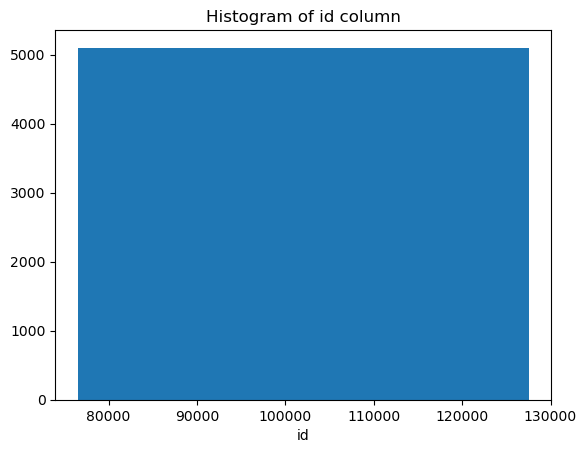

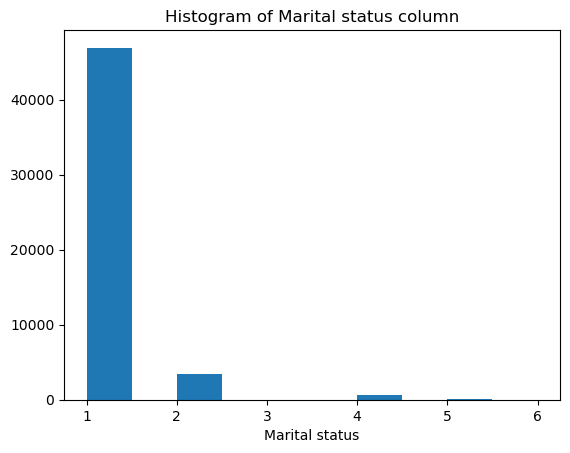

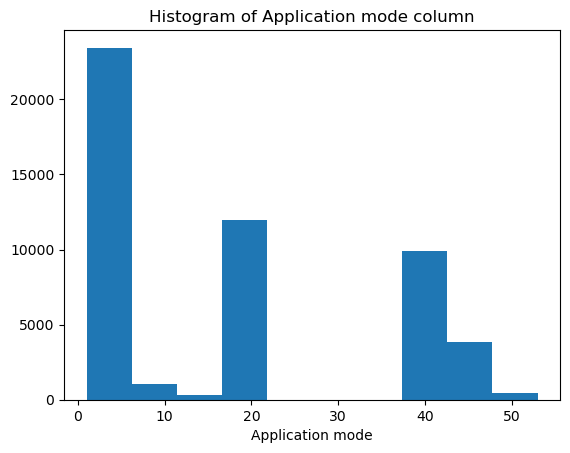

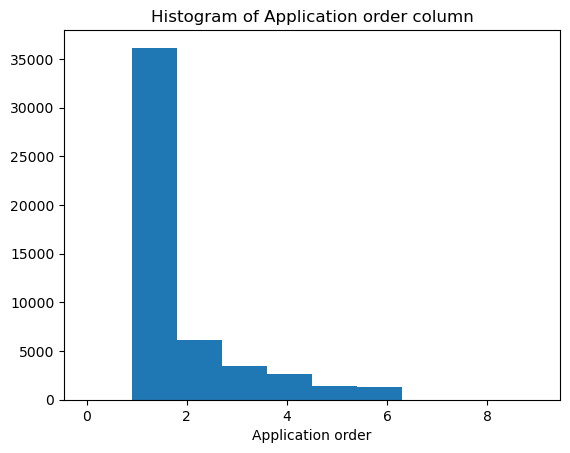

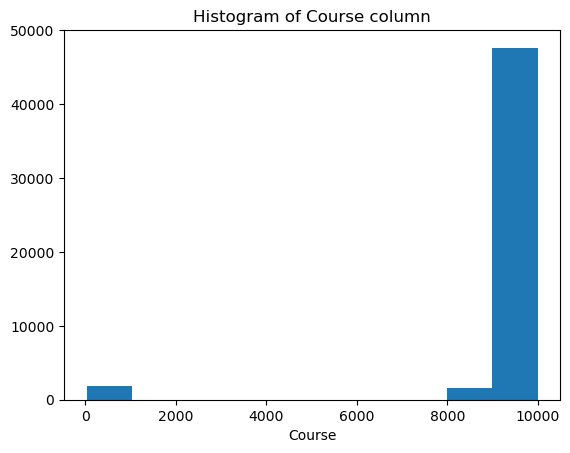

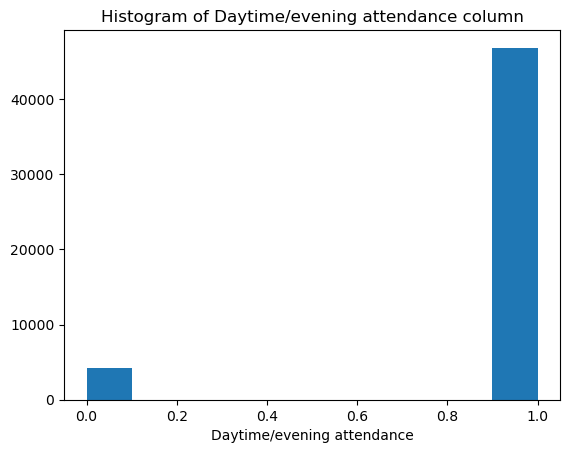

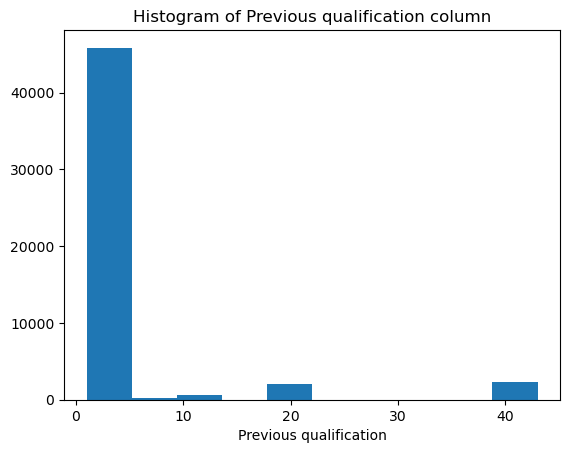

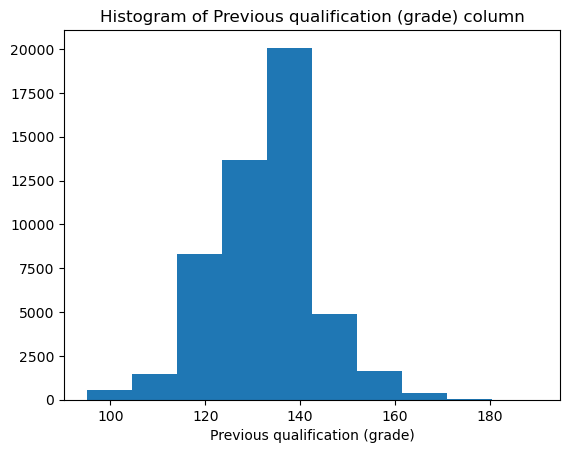

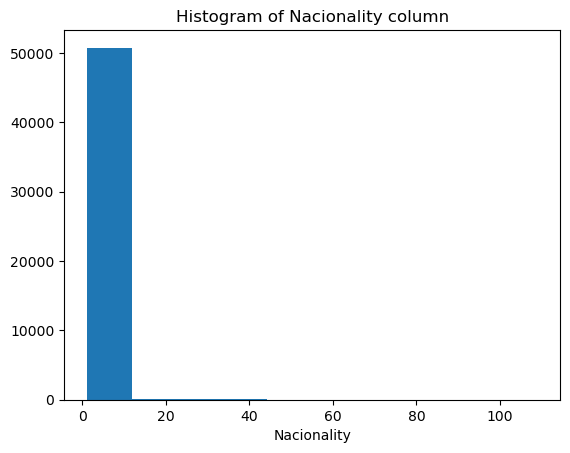

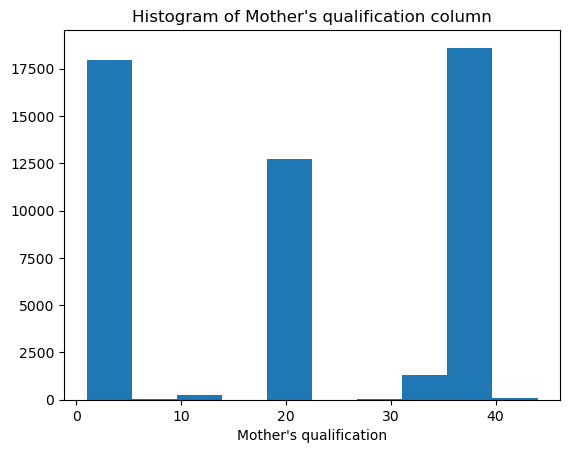

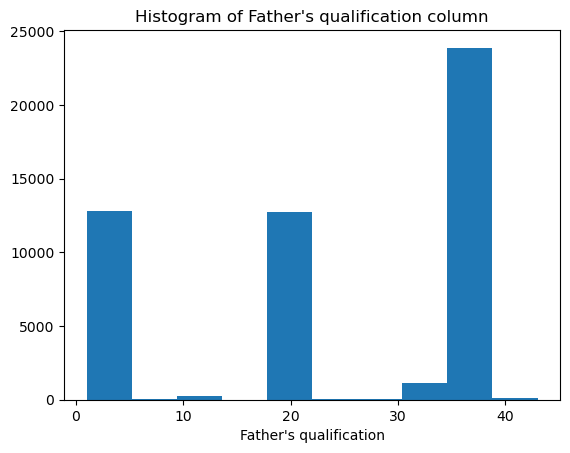

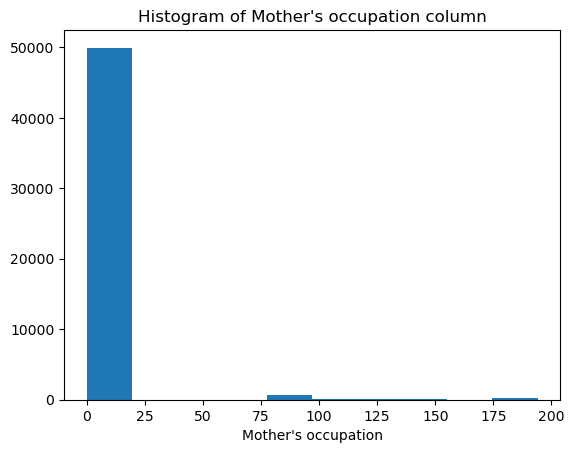

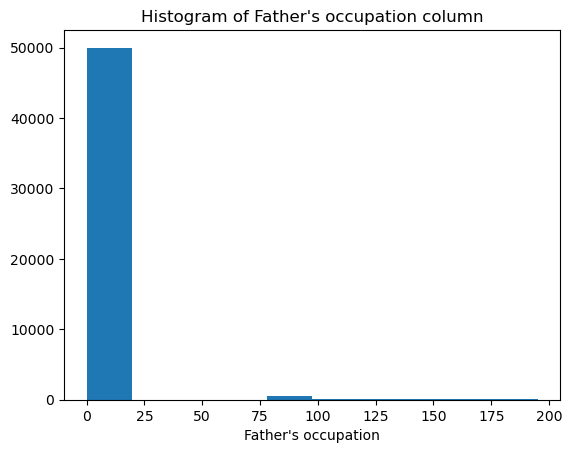

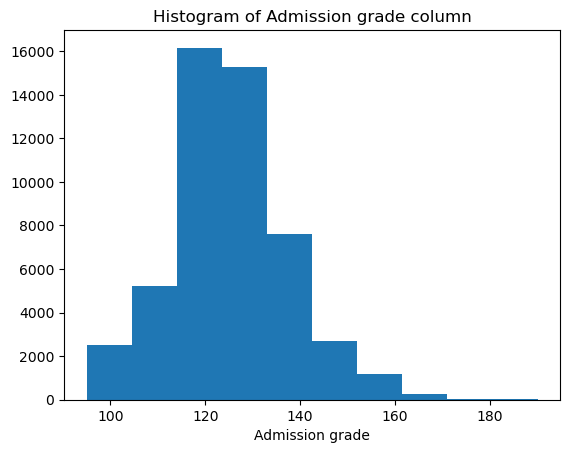

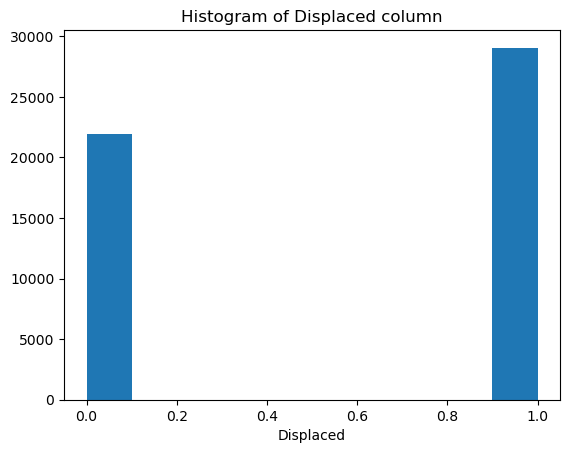

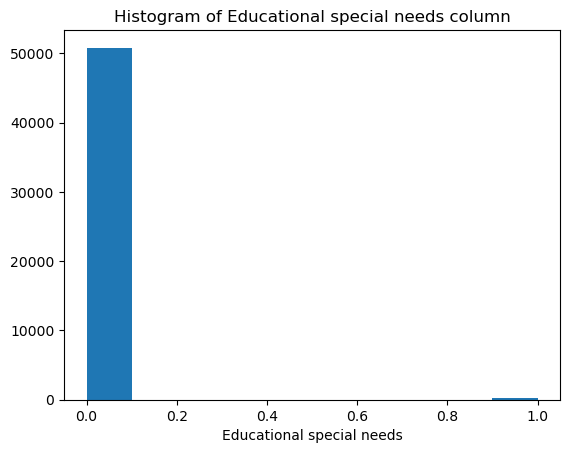

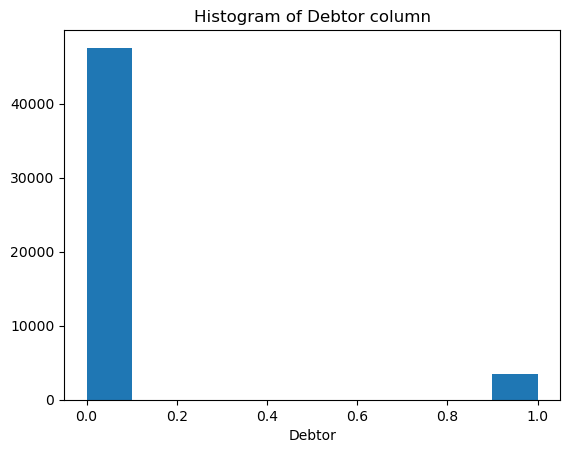

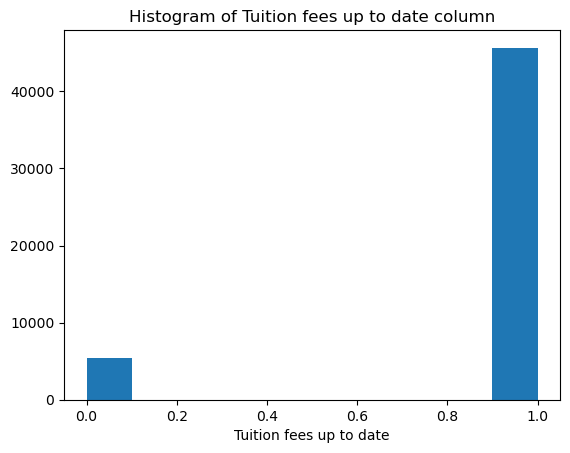

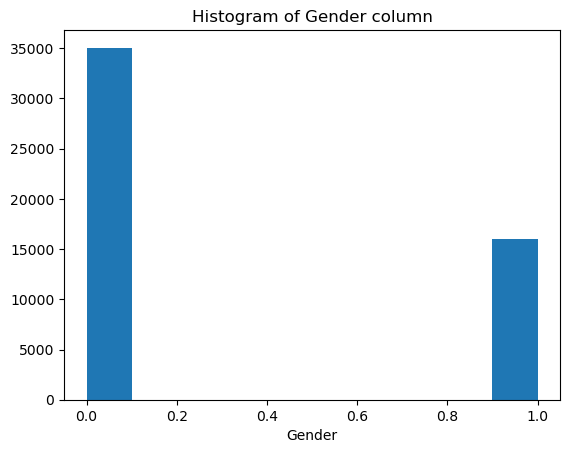

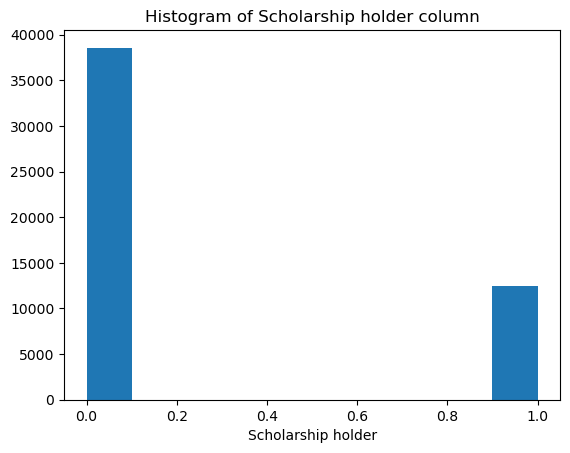

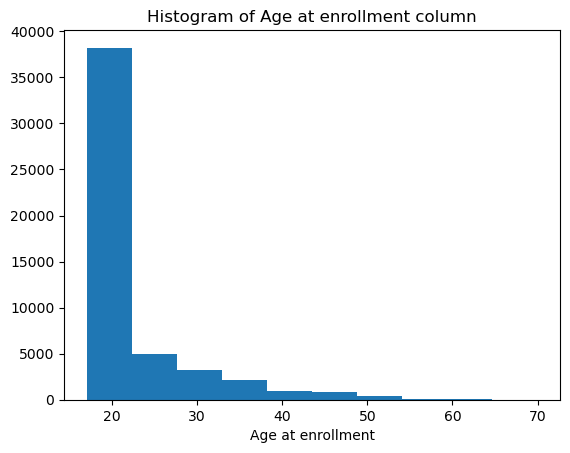

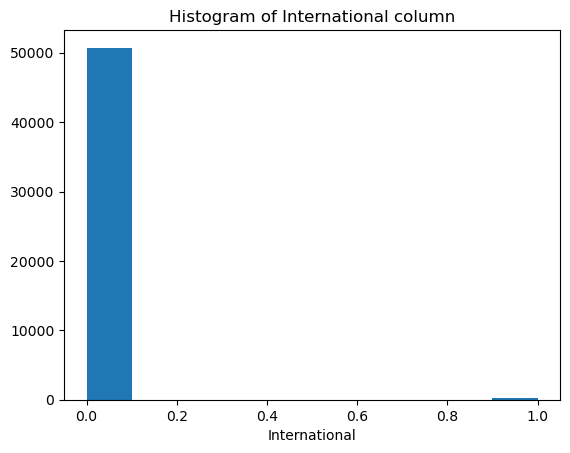

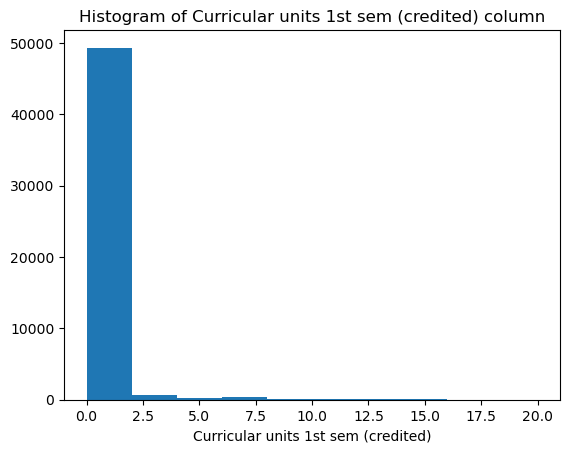

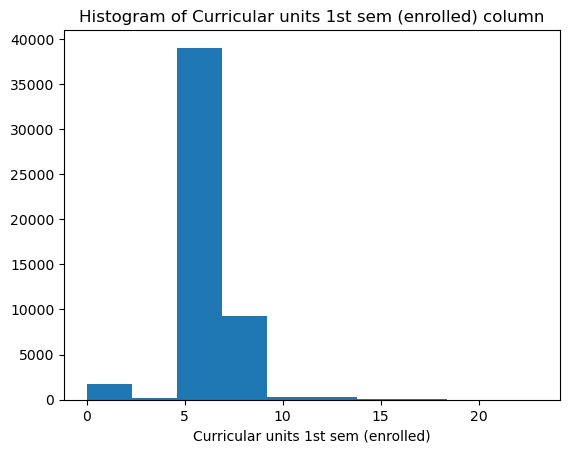

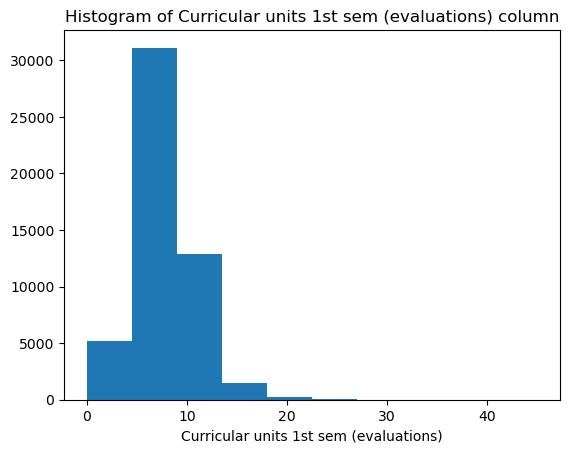

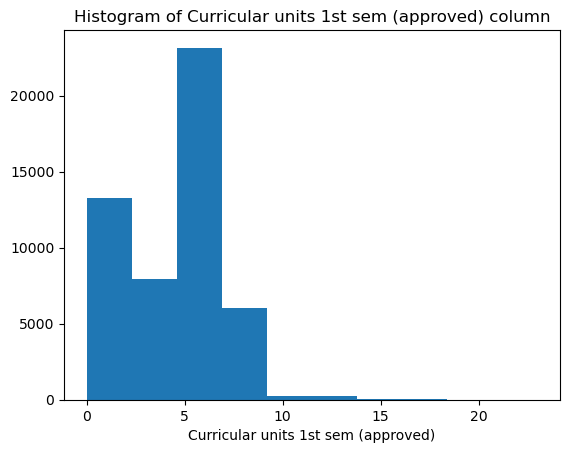

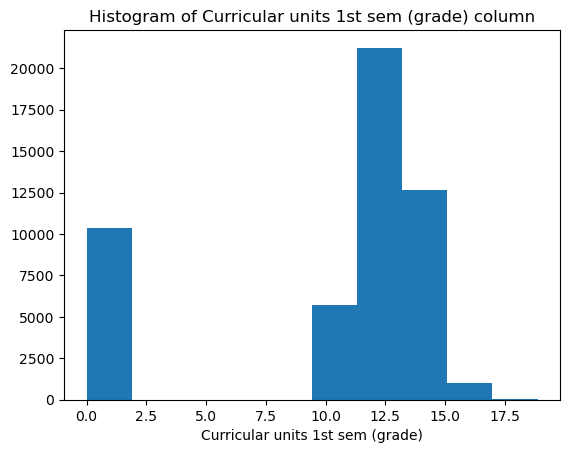

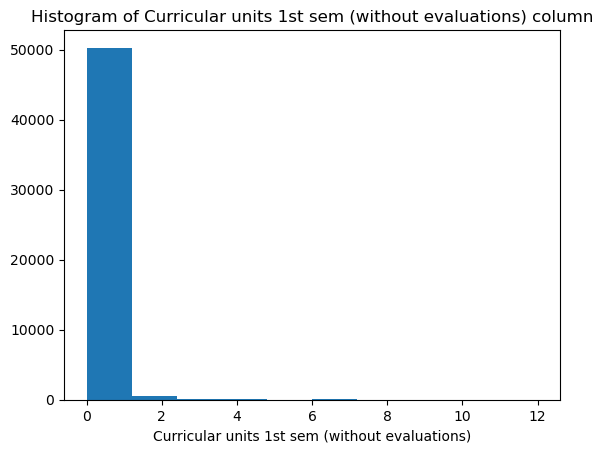

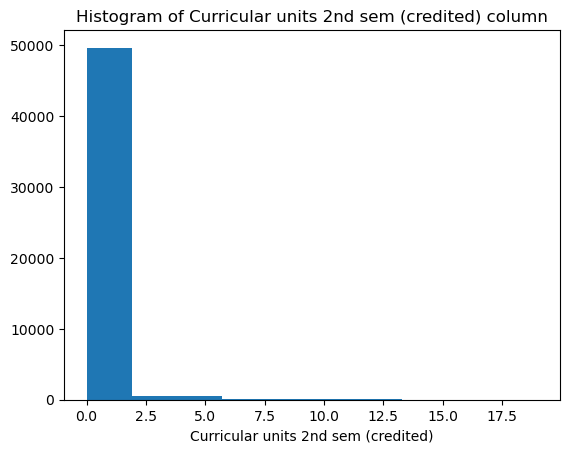

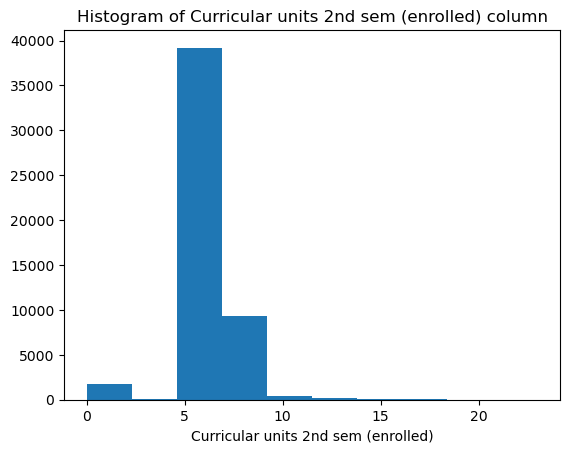

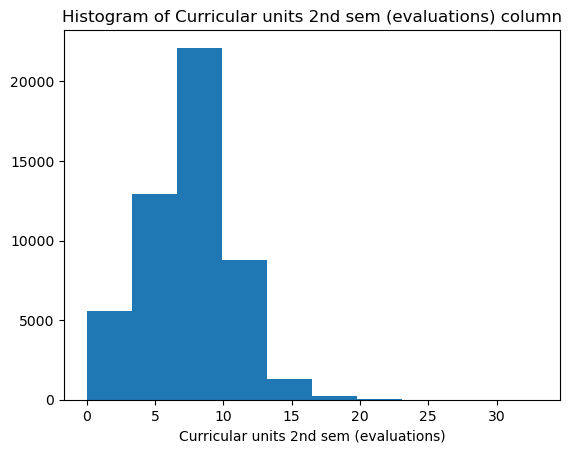

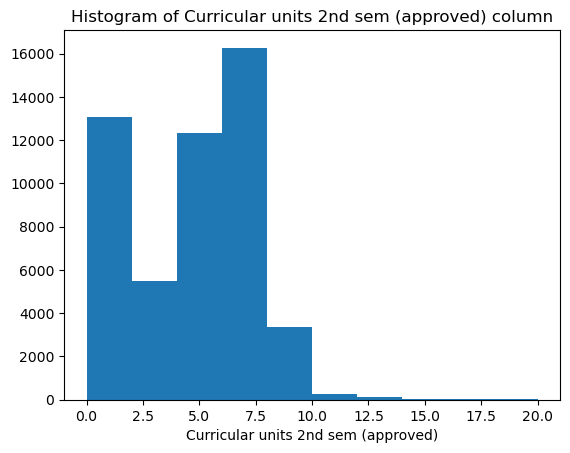

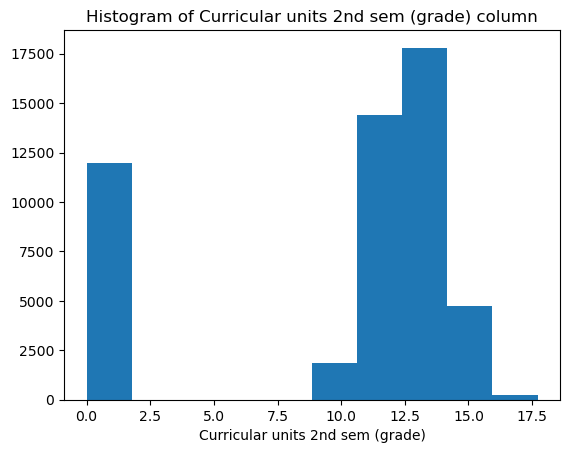

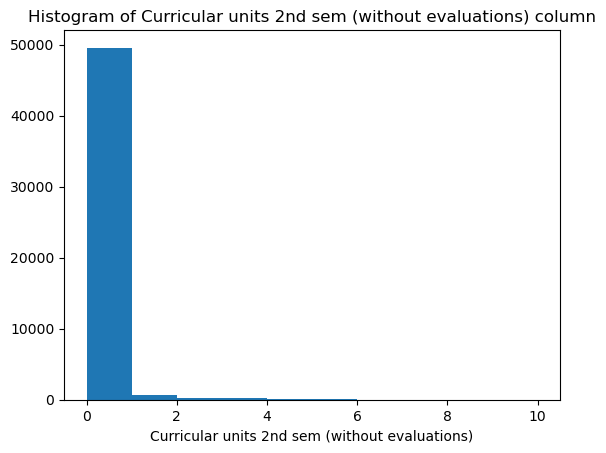

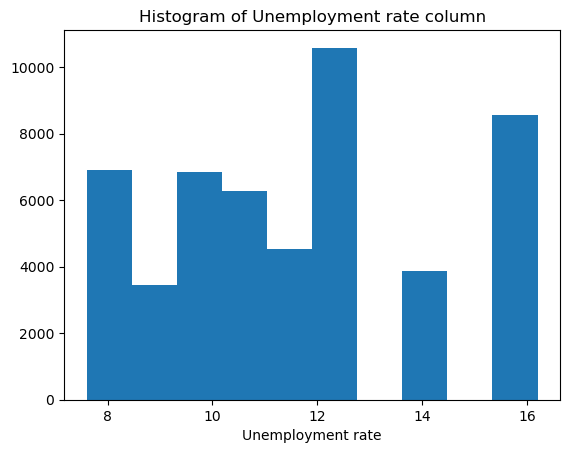

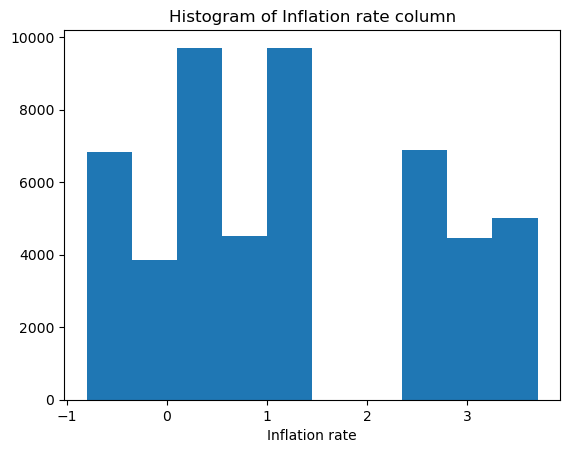

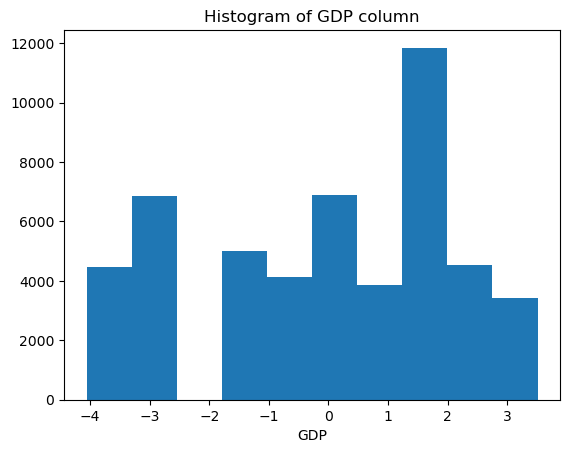

In [73]:
for col in test: 
    plt.hist(test[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.show()

In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

In [75]:
y_col = 'Target'
all_col = train.columns.to_list()
all_col.remove(y_col)

In [77]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
train[all_col] = scaler.fit_transform(train[all_col])
test[all_col] = scaler.transform(test[all_col])

le = LabelEncoder()
train[y_col] = le.fit_transform(train[y_col])

In [79]:
test

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,-0.253437,-0.902423,-0.524066,0.276537,0.304173,-0.308308,0.784087,-0.066801,-1.093399,...,-0.14189,-0.146765,1.270048,-2.065210,-1.445110,-1.735681,-0.135127,0.896848,-1.092515,0.386841
1,76519,-0.253437,-0.902423,-0.524066,0.131258,0.304173,-0.308308,-0.398241,-0.066801,-1.223274,...,-0.14189,-0.146765,0.040921,-0.352401,0.718660,0.698506,-0.135127,-0.158418,-0.449110,0.933176
2,76520,-0.253437,-0.902423,-0.524066,0.131258,0.304173,-0.308308,-1.307724,-0.066801,-1.223274,...,-0.14189,-0.146765,0.040921,1.074940,0.358031,0.247731,-0.135127,1.499858,1.123659,-1.767406
3,76521,-0.253437,1.675171,-0.524066,0.080798,0.304173,4.098145,-0.216345,-0.066801,-1.223274,...,-0.14189,3.065833,1.270048,1.931344,0.358031,0.247731,-0.135127,-0.987556,0.122806,1.594996
4,76522,-0.253437,1.375451,-0.524066,0.370802,0.304173,-0.308308,-2.035311,-0.066801,-1.223274,...,-0.14189,-0.146765,0.040921,0.504003,-0.002597,0.187627,4.192905,-1.477502,0.980680,0.178079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,-0.253437,-0.902423,0.289183,-4.896393,0.304173,-0.308308,-0.398241,-0.066801,1.179424,...,-0.14189,-0.146765,-3.646459,-2.065210,-1.445110,-1.735681,-0.135127,1.499858,1.123659,-1.767406
51008,127526,2.010717,1.375451,-0.524066,0.065272,0.304173,1.778959,0.065595,-0.066801,-0.054394,...,-0.14189,-0.146765,-0.573642,-0.637869,-1.445110,-1.735681,-0.135127,-0.799116,-1.449963,-1.349882
51009,127527,-0.253437,-0.902423,-0.524066,-4.896393,0.304173,-0.308308,-0.489190,-0.066801,-1.223274,...,-0.14189,-0.146765,-3.646459,-2.065210,-1.445110,-1.735681,-0.135127,1.499858,1.123659,-1.767406
51010,127528,-0.253437,-0.902423,1.102431,0.427915,0.304173,-0.308308,-0.034448,-0.066801,-0.054394,...,-0.14189,-0.146765,0.040921,0.504003,-0.363225,0.608351,-0.135127,-1.477502,0.980680,0.178079


In [91]:
from sklearn.model_selection import train_test_split

In [81]:
train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.253437,-0.902423,-0.524066,0.131258,0.304173,-0.308308,-0.580138,-0.066801,-1.223274,-0.296566,...,-0.146765,0.040921,-0.066933,0.718660,0.505317,-0.135127,-0.158418,-0.449110,0.933176,2
1,-0.253437,0.056682,-0.524066,0.131258,0.304173,-0.308308,-0.671086,-0.066801,-0.054394,-0.296566,...,-0.146765,0.040921,0.504003,-1.445110,-1.735681,-0.135127,-0.158418,-0.449110,0.933176,0
2,-0.253437,0.056682,0.289183,0.140130,0.304173,-0.308308,0.420293,-0.066801,-1.093399,-0.296566,...,-0.146765,0.040921,-2.065210,-1.445110,-1.735681,-0.135127,1.763675,-0.663578,-0.372698,0
3,-0.253437,-0.902423,1.102431,0.276537,0.304173,-0.308308,-0.125396,-0.066801,-0.054394,-1.368875,...,-0.146765,1.270048,1.074940,1.079288,0.575895,-0.135127,-0.158418,-0.449110,0.933176,1
4,-0.253437,-0.902423,0.289183,0.276537,0.304173,-0.308308,-0.034448,-0.066801,-0.054394,0.909782,...,-0.146765,0.655484,1.360408,0.718660,0.596330,-0.135127,-1.477502,0.980680,0.178079,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,-0.253437,0.056682,-0.524066,0.140130,0.304173,-0.308308,-1.034880,-0.066801,-0.054394,-1.502914,...,-0.146765,0.040921,0.218535,0.358031,0.175607,-0.135127,0.896848,-1.092515,0.386841,2
76514,-0.253437,-0.902423,3.542175,0.140130,0.304173,-0.308308,-0.671086,-0.066801,-1.223274,0.976802,...,-0.146765,0.040921,0.504003,0.718660,0.766123,-0.135127,-0.799116,-1.449963,-1.349882,2
76515,8.803180,0.056682,-0.524066,0.046419,0.304173,-0.308308,0.511242,-0.066801,1.114486,0.909782,...,-0.146765,-0.573642,0.218535,0.358031,0.319855,2.028889,-0.799116,-1.449963,-1.349882,1
76516,-0.253437,-0.902423,1.102431,0.038102,0.304173,-0.308308,0.329345,-0.066801,1.179424,0.909782,...,-0.146765,0.040921,-2.065210,-1.445110,-1.735681,-0.135127,-1.477502,0.980680,0.178079,0


In [214]:
x = train.drop(y_col,axis=1)
y = train['Target']

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [220]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [221]:
y_pred1 = LR.predict(x_test)

In [222]:
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)

Accuracy: 0.8234448510193414


In [223]:
from sklearn.neighbors import KNeighborsClassifier

In [228]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 
y_pred2 = knn.predict(x_test)

In [229]:
accuracy = accuracy_score(y_test, y_pred2)
print('Accuracy:', accuracy)

Accuracy: 0.7768557239937272


In [230]:
from sklearn.naive_bayes import GaussianNB
bc = GaussianNB()
bc.fit(x_train,y_train)

GaussianNB()

In [231]:
y_pred3 = bc.predict(x_test)

In [232]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [233]:
print('Accuracy:',accuracy_score(y_pred3,y_test))
print('Precision:',precision_score(y_pred3,y_test,average='weighted'))
print('Recall:',recall_score(y_pred3,y_test,average='weighted'))
print('F1 Score:',f1_score(y_pred3,y_test,average='weighted'))

Accuracy: 0.7660088865656037
Precision: 0.7854060112773937
Recall: 0.7660088865656037
F1 Score: 0.7729342093302854


In [234]:
from sklearn.ensemble import RandomForestClassifier

RFC =RandomForestClassifier()

In [235]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [236]:
pred4 = RFC.predict(x_test)
Rfc_acc = accuracy_score(y_test,pred4)
Rfc_acc

0.8294563512807109

### USING TEST FILE FOR PREDICTION

In [245]:
X_train=x
Y_train=y
X_test=test

In [246]:
X_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.253437,-0.902423,-0.524066,0.276537,0.304173,-0.308308,0.784087,-0.066801,-1.093399,-1.502914,...,-0.14189,-0.146765,1.270048,-2.065210,-1.445110,-1.735681,-0.135127,0.896848,-1.092515,0.386841
1,-0.253437,-0.902423,-0.524066,0.131258,0.304173,-0.308308,-0.398241,-0.066801,-1.223274,-0.296566,...,-0.14189,-0.146765,0.040921,-0.352401,0.718660,0.698506,-0.135127,-0.158418,-0.449110,0.933176
2,-0.253437,-0.902423,-0.524066,0.131258,0.304173,-0.308308,-1.307724,-0.066801,-1.223274,-0.296566,...,-0.14189,-0.146765,0.040921,1.074940,0.358031,0.247731,-0.135127,1.499858,1.123659,-1.767406
3,-0.253437,1.675171,-0.524066,0.080798,0.304173,4.098145,-0.216345,-0.066801,-1.223274,-0.296566,...,-0.14189,3.065833,1.270048,1.931344,0.358031,0.247731,-0.135127,-0.987556,0.122806,1.594996
4,-0.253437,1.375451,-0.524066,0.370802,0.304173,-0.308308,-2.035311,-0.066801,-1.223274,0.909782,...,-0.14189,-0.146765,0.040921,0.504003,-0.002597,0.187627,4.192905,-1.477502,0.980680,0.178079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,-0.253437,-0.902423,0.289183,-4.896393,0.304173,-0.308308,-0.398241,-0.066801,1.179424,0.909782,...,-0.14189,-0.146765,-3.646459,-2.065210,-1.445110,-1.735681,-0.135127,1.499858,1.123659,-1.767406
51008,2.010717,1.375451,-0.524066,0.065272,0.304173,1.778959,0.065595,-0.066801,-0.054394,0.909782,...,-0.14189,-0.146765,-0.573642,-0.637869,-1.445110,-1.735681,-0.135127,-0.799116,-1.449963,-1.349882
51009,-0.253437,-0.902423,-0.524066,-4.896393,0.304173,-0.308308,-0.489190,-0.066801,-1.223274,-1.502914,...,-0.14189,-0.146765,-3.646459,-2.065210,-1.445110,-1.735681,-0.135127,1.499858,1.123659,-1.767406
51010,-0.253437,-0.902423,1.102431,0.427915,0.304173,-0.308308,-0.034448,-0.066801,-0.054394,-0.296566,...,-0.14189,-0.146765,0.040921,0.504003,-0.363225,0.608351,-0.135127,-1.477502,0.980680,0.178079


In [247]:
X_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.253437,-0.902423,-0.524066,0.131258,0.304173,-0.308308,-0.580138,-0.066801,-1.223274,-0.296566,...,-0.141890,-0.146765,0.040921,-0.066933,0.718660,0.505317,-0.135127,-0.158418,-0.449110,0.933176
1,-0.253437,0.056682,-0.524066,0.131258,0.304173,-0.308308,-0.671086,-0.066801,-0.054394,-0.296566,...,-0.141890,-0.146765,0.040921,0.504003,-1.445110,-1.735681,-0.135127,-0.158418,-0.449110,0.933176
2,-0.253437,0.056682,0.289183,0.140130,0.304173,-0.308308,0.420293,-0.066801,-1.093399,-0.296566,...,-0.141890,-0.146765,0.040921,-2.065210,-1.445110,-1.735681,-0.135127,1.763675,-0.663578,-0.372698
3,-0.253437,-0.902423,1.102431,0.276537,0.304173,-0.308308,-0.125396,-0.066801,-0.054394,-1.368875,...,-0.141890,-0.146765,1.270048,1.074940,1.079288,0.575895,-0.135127,-0.158418,-0.449110,0.933176
4,-0.253437,-0.902423,0.289183,0.276537,0.304173,-0.308308,-0.034448,-0.066801,-0.054394,0.909782,...,-0.141890,-0.146765,0.655484,1.360408,0.718660,0.596330,-0.135127,-1.477502,0.980680,0.178079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,-0.253437,0.056682,-0.524066,0.140130,0.304173,-0.308308,-1.034880,-0.066801,-0.054394,-1.502914,...,-0.141890,-0.146765,0.040921,0.218535,0.358031,0.175607,-0.135127,0.896848,-1.092515,0.386841
76514,-0.253437,-0.902423,3.542175,0.140130,0.304173,-0.308308,-0.671086,-0.066801,-1.223274,0.976802,...,-0.141890,-0.146765,0.040921,0.504003,0.718660,0.766123,-0.135127,-0.799116,-1.449963,-1.349882
76515,8.803180,0.056682,-0.524066,0.046419,0.304173,-0.308308,0.511242,-0.066801,1.114486,0.909782,...,4.754221,-0.146765,-0.573642,0.218535,0.358031,0.319855,2.028889,-0.799116,-1.449963,-1.349882
76516,-0.253437,-0.902423,1.102431,0.038102,0.304173,-0.308308,0.329345,-0.066801,1.179424,0.909782,...,-0.141890,-0.146765,0.040921,-2.065210,-1.445110,-1.735681,-0.135127,-1.477502,0.980680,0.178079


In [248]:
RFC =RandomForestClassifier()
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [249]:
prediction = RFC.predict(X_test)

In [261]:
test_df = pd.read_csv("C://Users//ACER//Downloads/playground-series-s4e6/test.csv")

In [273]:
submission_1 = pd.read_csv("C://Users//ACER//Downloads/playground-series-s4e6/sample_submission.csv")

In [277]:
submission_1

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate
...,...,...
51007,127525,Graduate
51008,127526,Graduate
51009,127527,Graduate
51010,127528,Graduate


In [279]:
submission_1['id'] = test_df['id']
submission_1['Target'] = prediction

In [281]:
submission_1['Target'].replace(0, 'Dropout', inplace=True)
submission_1['Target'].replace(1, 'Enrolled', inplace=True)
submission_1['Target'].replace(2, 'Graduate', inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13868\2712237891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  submission_1['Target'].replace(0, 'Dropout', inplace=True)


In [283]:
submission_1

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [285]:
submission_1.to_csv("C://Users//ACER//Downloads/playground-series-s4e6/my_submission.csv", index=False)